In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualizations
import os
from faker import Faker
import csv
import random
fake = Faker('en_US')
Faker.seed(0)
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter("ignore")


# import libraries
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib.pyplot as plt
#from __future__ import division

#import plotly.plotly as py
#import plotly.offline as pyoff
#import plotly.graph_objs as go

#inititate Plotly
#pyoff.init_notebook_mode()

In [68]:
df = pd.read_csv('C:/Users/sumee/Downloads/e_commerce_synthetic_data.csv')

In [69]:
df.columns

Index(['Unnamed: 0', 'user_session', 'campaign', 'promotion', 'channel',
       'discount', 'user_id', 'Street Address', 'City', 'State', 'ZipCode',
       'event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'selling_price'],
      dtype='object')

In [70]:
df = df.drop(['Unnamed: 0'],axis =1)

In [71]:
df.head()

,user_session,campaign,promotion,channel,discount,user_id,Street Address,City,State,ZipCode,event_time,event_type,product_id,category_id,category_code,brand,price,selling_price
0,52dfd59b-9b58-40da-92ba-a62689d57bf6,Social Media,Discount,Desktop,15,526262645,9709 Mayo Forges,North Courtney,California,49901,2019-12-07 08:38:40 UTC,view,5560760,1487580006300255120,NaN,strong,201.59,171.3515
1,fb89ee20-a199-44ef-a88d-45a87b83fdc6,Social Media,Discount,Desktop,15,587745891,658 Garcia Road Apt. 885,North Jason,Wisconsin,86227,2019-12-16 16:23:23 UTC,view,5698325,1487580011752849537,NaN,estelare,5.16,4.3860
2,2549b8b7-e140-4201-9c00-a300d468da60,E-mail,Discount,Desktop,10,609425296,068 Mark Ville,Port Richard,Illinois,26100,2020-02-02 10:51:18 UTC,view,5769925,1487580013841613016,NaN,kapous,4.22,3.7980
3,4cf6df21-216a-409e-ba43-e8c4d4bf0c6d,Social Media,Discount,Desktop,10,553325629,6753 Haas Streets Apt. 170,Markbury,Illinois,13534,2019-11-04 13:54:47 UTC,view,5584836,1487580013581566154,NaN,levissime,4.95,4.4550
4,4cf6df21-216a-409e-ba43-e8c4d4bf0c6d,Social Media,Discount,Desktop,10,553325629,6753 Haas Streets Apt. 170,Markbury,Illinois,13534,2019-11-04 13:55:09 UTC,cart,5304,1487580009471148064,NaN,runail,0.32,0.2880


In [72]:
df.price.describe()

count    1.193275e+07
mean     9.469737e+00
std      2.150771e+01
min      0.000000e+00
25%      2.210000e+00
50%      4.110000e+00
75%      7.140000e+00
max      3.277800e+02
Name: price, dtype: float64

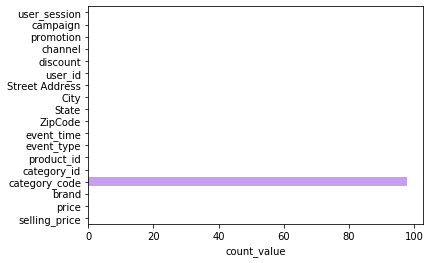

In [73]:
null_values = pd.DataFrame(100*(df.isnull().sum()/len(df)),columns=['count_value'])
ax = sns.barplot(null_values.count_value,null_values.index)

In [74]:
# df = df.drop(['category_code'],axis =1)

In [75]:
len(df[df.event_type == 'purchase'])

737314

In [76]:
df_purchased = df[df.event_type == 'purchase'].reset_index(drop = True)

In [158]:
df_purchased.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737314 entries, 0 to 737313
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_session    737314 non-null  object        
 1   campaign        737314 non-null  object        
 2   promotion       737314 non-null  object        
 3   channel         737314 non-null  object        
 4   discount        737314 non-null  int64         
 5   user_id         737314 non-null  int64         
 6   Street Address  737314 non-null  object        
 7   City            737314 non-null  object        
 8   State           737314 non-null  object        
 9   ZipCode         737314 non-null  int64         
 10  event_time      737314 non-null  datetime64[ns]
 11  event_type      737314 non-null  object        
 12  product_id      737314 non-null  int64         
 13  category_id     737314 non-null  int64         
 14  category_code   13847 non-null   obj

In [78]:
#create a generic user dataframe to keep CustomerID and new segmentation scores
df_users_purchased = pd.DataFrame(df_purchased['user_id'].unique())

In [79]:
df_users_purchased.columns = ['user_id']

In [155]:
len(df_users_purchased)

AttributeError: 'DataFrame' object has no attribute 'selling_price'

In [81]:
recency_df = df_purchased.groupby('user_id').event_time.max().reset_index()
recency_df.columns = ['user_id','LastPurchaseDate']

In [82]:
len(recency_df)

98458

In [83]:
recency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98458 entries, 0 to 98457
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           98458 non-null  int64 
 1   LastPurchaseDate  98458 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [84]:
recency_df['LastPurchaseDate'] = pd.to_datetime(recency_df['LastPurchaseDate'])

In [85]:
recency_df['LastPurchaseDate'] = recency_df['LastPurchaseDate'].dt.tz_localize(None)

In [86]:
import datetime as dt
import timezones
from datetime import datetime, timezone

now = datetime(2020, 3, 31, 0, 0, 0)

In [87]:
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)

In [88]:
recency_df.head()

,user_id,LastPurchaseDate,Recency
0,9794320,2019-11-25 05:07:13,126
1,10079204,2019-11-06 10:43:30,145
2,10280338,2020-02-19 15:21:31,40
3,12055855,2019-12-20 12:05:29,101
4,12936739,2020-01-17 07:51:19,73


In [89]:
len(recency_df.user_id)

98458

In [90]:
df_purchased['event_time'] = pd.to_datetime(df_purchased['event_time'])

In [91]:
df_purchased['event_time'] = df_purchased['event_time'].dt.tz_localize(None)

In [92]:
#check frequency of customer means how many transaction has been done..

frequency_df = df_purchased.copy()
frequency_df.drop_duplicates(subset=['user_id','event_time'], keep="first", inplace=True) 
frequency_df = frequency_df.groupby('user_id',as_index=False)['event_time'].count()
frequency_df.columns = ['user_id','Frequency']
frequency_df.head()

,user_id,Frequency
0,9794320,1
1,10079204,1
2,10280338,5
3,12055855,1
4,12936739,1


In [93]:
len(frequency_df.user_id.unique())

98458

In [159]:
monetary_df=df_purchased.groupby(['user_id'],as_index=False)['selling_price'].sum()
monetary_df.columns = ['user_id','Monetary']

In [160]:
monetary_df.Monetary.describe()

count    98458.000000
mean        36.069116
std         56.513231
min          0.051000
25%          9.639000
50%         19.411500
75%         40.180000
max       2357.095000
Name: Monetary, dtype: float64

In [161]:
#Combine all together all dataframe in so we have recency, frequency and monetary values together..

#combine first recency and frequency.
rf = recency_df.merge(frequency_df,on='user_id')

#combibe rf frame with monetary values.

rfm = rf.merge(monetary_df,left_on='user_id',right_on='user_id')

rfm.set_index('user_id',inplace=True)

rfm.head()

,LastPurchaseDate,Recency,Frequency,Monetary
user_id,,,,
9794320,2019-11-25 05:07:13,126,1,10.778
10079204,2019-11-06 10:43:30,145,1,20.648
10280338,2020-02-19 15:21:31,40,5,62.616
12055855,2019-12-20 12:05:29,101,1,16.540
12936739,2020-01-17 07:51:19,73,1,26.970


In [162]:
rfm = rfm.drop(['LastPurchaseDate'], axis=1)

In [163]:
rfm.head()

,Recency,Frequency,Monetary
user_id,,,
9794320,126,1,10.778
10079204,145,1,20.648
10280338,40,5,62.616
12055855,101,1,16.540
12936739,73,1,26.970


In [164]:
rfm_segmentation = rfm.copy()

In [165]:
rfm_segmentation.head()

,Recency,Frequency,Monetary
user_id,,,
9794320,126,1,10.778
10079204,145,1,20.648
10280338,40,5,62.616
12055855,101,1,16.540
12936739,73,1,26.970


We are going to apply K-means clustering to assign a recency score. But we should tell how many clusters we need to K-means algorithm. To find it out, we will apply Elbow Method. Elbow Method simply tells the optimal cluster number for optimal inertia

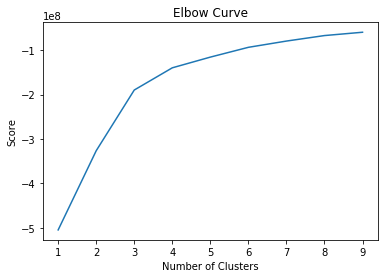

In [166]:
from sklearn.cluster import KMeans
# get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score.
#Elbow method is used to represnt that. 
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [167]:
#fitting data in Kmeans theorem.
kmeans = KMeans(n_clusters=3, random_state=0).fit(rfm_segmentation)

In [168]:
# this creates a new column called cluster which has cluster number for each row respectively.
rfm_segmentation['cluster'] = kmeans.labels_

In [169]:
#check our hypothesis

rfm_segmentation.cluster.value_counts()

1    48167
0    45833
2     4458
Name: cluster, dtype: int64

In [170]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster
user_id,,,,
9794320,126,1,10.778,1
10079204,145,1,20.648,1
10280338,40,5,62.616,0
12055855,101,1,16.540,1
12936739,73,1,26.970,0


In [171]:
rfm_segmentation = rfm_segmentation.reset_index()

In [172]:
rfm_segmentation.head()

,user_id,Recency,Frequency,Monetary,cluster
0,9794320,126,1,10.778,1
1,10079204,145,1,20.648,1
2,10280338,40,5,62.616,0
3,12055855,101,1,16.540,1
4,12936739,73,1,26.970,0


In [173]:
rfm_segmentation_users = pd.DataFrame(rfm_segmentation.user_id)
rfm_segmentation_users.head()

,user_id
0,9794320
1,10079204
2,10280338
3,12055855
4,12936739


In [174]:
rfm_segmentation = rfm_segmentation.drop(['user_id'],axis =1)
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster
0,126,1,10.778,1
1,145,1,20.648,1
2,40,5,62.616,0
3,101,1,16.540,1
4,73,1,26.970,0


In [175]:
rfm_segmentation['Status'] = 0
for i in range(0,len(rfm_segmentation)):
    if(rfm_segmentation['cluster'][i] == 0):
        rfm_segmentation['Status'][i] = "Silver"
    elif(rfm_segmentation['cluster'][i] == 1):
        rfm_segmentation['Status'][i]= "Gold"
    else:
        rfm_segmentation['Status'][i] ="Platinum"

In [176]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,cluster,Status
0,126,1,10.778,1,Gold
1,145,1,20.648,1,Gold
2,40,5,62.616,0,Silver
3,101,1,16.540,1,Gold
4,73,1,26.970,0,Silver


In [177]:
rfm_segmentation = pd.merge(rfm_segmentation_users,rfm_segmentation, left_index=True, right_index=True)

In [178]:
rfm_segmentation.head()

,user_id,Recency,Frequency,Monetary,cluster,Status
0,9794320,126,1,10.778,1,Gold
1,10079204,145,1,20.648,1,Gold
2,10280338,40,5,62.616,0,Silver
3,12055855,101,1,16.540,1,Gold
4,12936739,73,1,26.970,0,Silver


# CUSTOMER LIFETIME VALUE

1.Define an appropriate time frame for Customer Lifetime Value calculation
2.Identify the features we are going to use to predict future and create them
3 Calculate lifetime value (LTV) for training the machine learning model
4 Build and run the machine learning model

In [154]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split